# Gaussian Hidden Markov Models

In [1]:
import numpy as np
from scipy.stats import norm
from random import choice
import bisect
import pandas as pd

np.random.seed(37)

p = np.array([0.6, 0.4])
Z = np.array([[0.7, 0.3], [0.4, 0.6]])
A = Z.cumsum(axis=1)
T = [norm(1, 1), norm(5, 1)]

O_z = []
O_x = []

n_iters = 100_000

z = bisect.bisect_left(p.cumsum(), np.random.random())
x = T[z].rvs()

for it in range(n_iters):
    O_z.append(z)
    O_x.append(x)

    z = bisect.bisect_left(A[z], np.random.random())
    x = T[z].rvs()

O_z = np.array(O_z)
O_x = np.array(O_x)

In [2]:
s = pd.Series(O_z).value_counts().sort_index()
s / s.sum()

0    0.57421
1    0.42579
dtype: float64

In [3]:
O_z

array([1, 1, 1, ..., 0, 1, 1])

In [4]:
O_x

array([ 3.62328106,  4.83910832,  4.3358552 , ..., -0.55832225,
        3.61938788,  4.89798618])

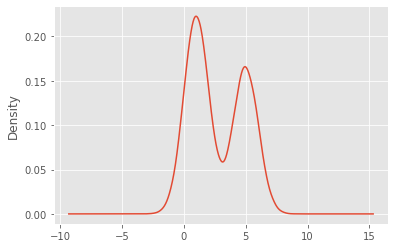

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

_ = pd.Series(O_x).plot(kind='kde')

In [6]:
from hmmlearn import hmm

Q = O_x.reshape(O_x.shape[0], 1)

model = hmm.GaussianHMM(n_components=2, n_iter=2_000).fit(Q)

In [7]:
hidden_states = model.predict(Q)
mus = np.ravel(model.means_)
sigmas = np.ravel(np.sqrt([np.diag(c) for c in model.covars_]))
P = model.transmat_

In [8]:
s = pd.Series(hidden_states).value_counts().sort_index()
s / s.sum()

0    0.57365
1    0.42635
dtype: float64

In [9]:
mus, sigmas

(array([1.00006561, 4.98655358]), array([1.00133963, 1.00569075]))

In [10]:
P

array([[0.70078564, 0.29921436],
       [0.40153297, 0.59846703]])